## Demo for Denoising Autoencoders

In [7]:
from src import *

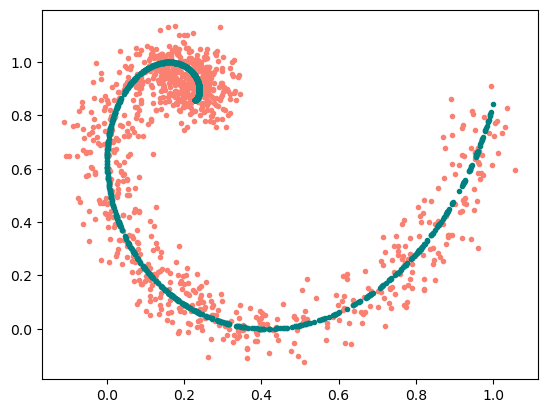

<Figure size 640x480 with 0 Axes>

In [8]:
# generate the data
# possible shapes are "line","circle", and "spiral"
shape_name = "spiral"
x,y = generate(shape_name, 1000)

# corrupt the data
x_c, y_c = corruption_process(x, y, sigma=0.05)
save_data(shape_name, x, y, x_c, y_c)
plot_data(shape_name, x, y, x_c, y_c)


In [9]:
import torch.nn as nn
import torch.optim as optim

# load data for training
X_train, y_train, X_test,  y_test = load_data(shape_name)

# instantiate autoencoder
model = Autoencoder()

# set hyper parameters for training
hps = {
    'criterion': nn.MSELoss(),
    'learning_rate': 0.001,
    'optimizer': optim.Adam,
    'n_epochs': 75,
    'batch_size': 64
}

# instantiate trainer
trainer = Trainer(model, hps)

# call training loop
trainer.training_loop(X_train, y_train, X_test, y_test)

# save
save_model(model, shape_name)

Training: 100%|██████████| 75/75 [00:00<00:00, 104.75it/s]


Epoch 74: Loss=0.00, Accuracy=72.8%


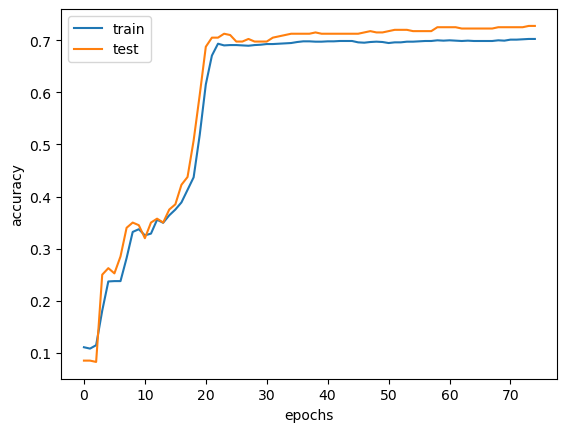

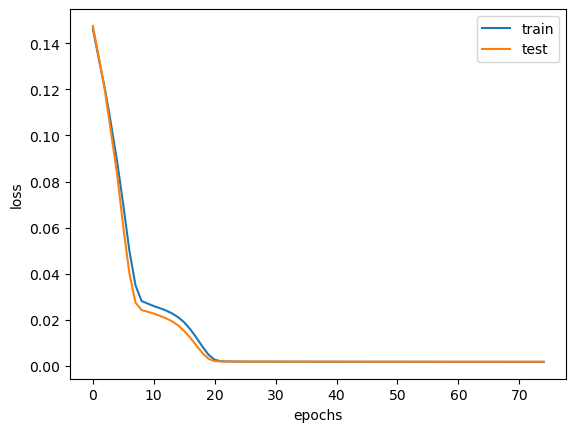

<Figure size 640x480 with 0 Axes>

In [10]:
# plot performance
plot_acc(trainer, shape_name)
plot_loss(trainer, shape_name)

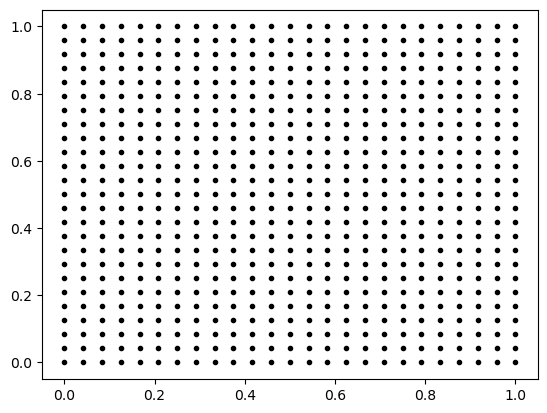

In [11]:
# generate a grid of points
grid = gen_grid_data(25, bot_left=(0,0), top_right=(1,1))
plt.scatter(grid[:,0], grid[:,1], marker='.', c='black')

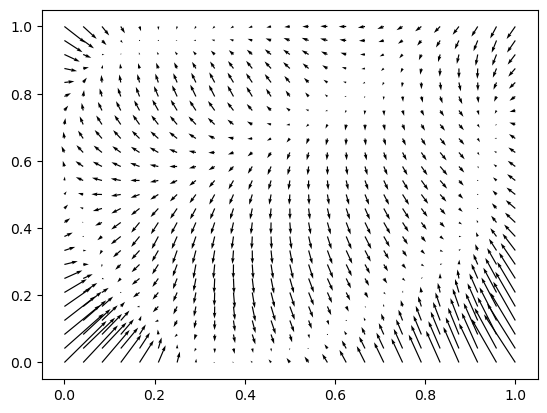

<Figure size 640x480 with 0 Axes>

In [12]:
# feed the grid into the model and see the magic happen :)
prediction = model(grid)
plot_vectorfield(shape_name, grid, prediction)